<a href="https://colab.research.google.com/github/jamesnatoli/ABCD_Exercise_HTT/blob/main/HTT_ABCD_2012OpenData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABCD Exercise

First, we need to import some powerful python modules, which allow us to store and manipulate the data

In [2]:
import pandas as pd
import numpy as np

We'll now clone a git repository that contains the files we need, as well as a helpful python script for plotting. Using this out of the box will allow us to focus on the ABCD method and not the technicalities of plotting

In [3]:
!git clone https://github.com/jamesnatoli/HiggsTauTauNanoAODOutreachAnalysis.git
!ls

Cloning into 'HiggsTauTauNanoAODOutreachAnalysis'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 243 (delta 7), reused 8 (delta 6), pack-reused 226
Receiving objects: 100% (243/243), 63.15 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Updating files: 100% (88/88), done.
HiggsTauTauNanoAODOutreachAnalysis  sample_data


Now let's cd (change directory) in to the git repo we just cloned, and make sure everything is there

In [4]:
%cd HiggsTauTauNanoAODOutreachAnalysis
!ls

/content/HiggsTauTauNanoAODOutreachAnalysis
4-quick_start_to_CMS_open_data.ipynb  plots			       TTbarSkim_store.csv
createDataFrame.py		      README.md			       VBF_HToTauTauSkim_store.csv
DYJetsToLLSkim_store.csv	      reana.yaml		       W1JetsToLNuSkim_store.csv
GluGluToHToTauTauSkim_store.csv       Run2012B_TauPlusXSkim_store.csv  W2JetsToLNuSkim_store.csv
histograms.py			      Run2012C_TauPlusXSkim_store.csv  W3JetsToLNuSkim_store.csv
LICENSE				      run.sh
plot.py				      skim.cxx


Now we can load the data, which is stored in csv (comma separated values) format. This storage method is very simple, but allows values to be read by many different applications

In [121]:
inputs = {'DYJetsToLL_ZLL':    'ZLL', # Drell-Yan --> 2 Leptons
          'DYJetsToLL_ZTT':    'ZTT', # Drell-Yan --> 2 Taus
          'W1JetsToLNu':       'W1J', # W Boson + 1 Jet --> Lepton + Neutrino
          'W2JetsToLNu':       'W2J', # W Boson + 2 Jets --> Lepton + Neutrino
          'W3JetsToLNu':       'W3J', # W Boson + 3 Jets --> Lepton + Neutrino
          'TTbar':             'TT',  # Top + AntiTop
          'VBF_HToTauTau':     'qqH', # Vector Boson Fusion
          'GluGluToHToTauTau': 'ggH', # Gluon Gluon Fusion
          'Run2012B_TauPlusX': 'dataRunB', # Data, Era B (4.485 /fb)
          'Run2012C_TauPlusX': 'dataRunC', # Data, Era C (6.614 /fb)
          }

events = pd.DataFrame()
to_concat = []
labels = []
for ifile, label in inputs.items():
  # we use read_csv function from pandas to read the eventgs into a "data frame"
  print(f'Loading {ifile}...')
  if 'DYJetsToLL' in ifile: ifile = 'DYJetsToLL'
  input_df = pd.read_csv(ifile+'Skim_store.csv')
  input_df['label'] = np.full(len(input_df), label) # add column with the labels
  to_concat.append(input_df)
  labels.append(label)

# now we put them all in the same object
events = pd.concat(to_concat)

# lets take a peak inside...
events.head()

Loading DYJetsToLL_ZLL...
Loading DYJetsToLL_ZTT...
Loading W1JetsToLNu...
Loading W2JetsToLNu...
Loading W3JetsToLNu...
Loading TTbar...
Loading VBF_HToTauTau...
Loading GluGluToHToTauTau...
Loading Run2012B_TauPlusX...
Loading Run2012C_TauPlusX...


,Unnamed: 0,njets,npv,pt_1,eta_1,phi_1,m_1,iso_1,q_1,mt_1,...,m_vis,pt_vis,mjj,ptjj,jdeta,gen_match,run,weight,sample_name,label
0,0,0,17,17.545351,-0.787461,1.523578,0.105658,0.127352,1,19.278289,...,62.613564,12.580107,-999.0,-999.0,-999.0,True,194533,1.319055,DYJetsToLLSkim,ZLL
1,1,0,19,21.322285,0.734122,2.959332,0.105658,0.069089,-1,8.830149,...,49.865227,6.382893,-999.0,-999.0,-999.0,True,194533,1.319055,DYJetsToLLSkim,ZLL
2,2,0,11,21.152906,-0.417071,-1.380073,0.105658,0.159884,1,0.875113,...,68.722560,23.421194,-999.0,-999.0,-999.0,True,194533,1.319055,DYJetsToLLSkim,ZLL
3,3,0,13,26.634708,1.823677,1.022758,0.105658,0.000000,-1,34.184495,...,64.033040,8.310519,-999.0,-999.0,-999.0,True,200519,1.319055,DYJetsToLLSkim,ZLL
4,4,1,15,19.996640,-0.504789,2.123815,0.105658,0.042825,1,0.869223,...,21.241768,40.054832,-999.0,-999.0,-999.0,True,200519,1.319055,DYJetsToLLSkim,ZLL


In [123]:
events = events[ # Split up the Drell-Yan sample in to ZLL and ZTT
    ((events['label'] != 'ZTT') | ((events['label'] == 'ZTT') & events['gen_match'])) &
    ((events['label'] != 'ZLL') | ((events['label'] == 'ZLL') & ~events['gen_match']))
    ]

# Now select isolated events
iso_events = events[
    (events['mt_1'] < 30) & # Muon transverse mass cut for W+jets suppression
    (events['iso_1'] < 0.1) # Require isolated muon for signal region
    ]

# let's take another peak now...
iso_events.head()

,Unnamed: 0,njets,npv,pt_1,eta_1,phi_1,m_1,iso_1,q_1,mt_1,...,m_vis,pt_vis,mjj,ptjj,jdeta,gen_match,run,weight,sample_name,label
13,13,0,21,59.290077,-0.185510,-2.429436,0.105658,0.094182,-1,9.183883,...,122.37241,32.600033,-999.0,-999.0,-999.0,False,200519,1.319055,DYJetsToLLSkim,ZLL
18,18,1,11,29.510347,1.302142,0.888718,0.105658,0.040348,1,17.233894,...,102.09473,18.583984,-999.0,-999.0,-999.0,False,206859,1.319055,DYJetsToLLSkim,ZLL
42,42,0,12,53.665688,-1.072835,-1.091055,0.105658,0.000000,-1,8.437947,...,76.50453,32.321810,-999.0,-999.0,-999.0,False,200519,1.319055,DYJetsToLLSkim,ZLL
47,47,1,25,28.043259,1.359530,3.002496,0.105658,0.028013,1,2.420709,...,82.98091,14.395263,-999.0,-999.0,-999.0,False,200519,1.319055,DYJetsToLLSkim,ZLL
62,62,0,5,51.222710,-0.221325,-2.377358,0.105658,0.000000,-1,15.276152,...,98.21988,41.185360,-999.0,-999.0,-999.0,False,200519,1.319055,DYJetsToLLSkim,ZLL


In [124]:
SS_events = iso_events[
    iso_events['q_1']*iso_events['q_2'] < 0
]

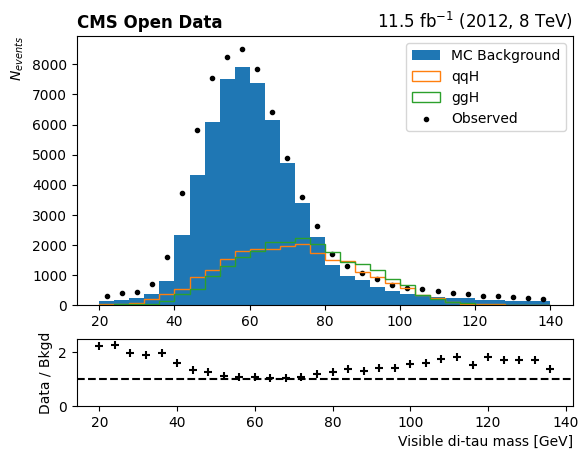

In [211]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Group these names for convenience
signals     = ['qqH', 'ggH']
backgrounds = ['ZLL', 'ZTT', 'W1J', 'W2J', 'W3J', 'TT']
data        = ['dataRunB', 'dataRunC']

# Create 2 plots
fig, (ax1, ax2) = plt.subplots( nrows=2, height_ratios=[4,1])

# Plot Monte Carlo (MC) Backgrounds
bkgdcounts, bins, patches = ax1.hist( SS_events[SS_events['label'].isin(backgrounds)]['m_vis'],
                                     bins=30, range=[20, 140], weights=SS_events[SS_events['label'].isin(backgrounds)]['weight'], label='MC Background')

# Plot Signals
qqHcounts, bins, patches = ax1.hist( SS_events[SS_events['label']=='qqH']['m_vis'],
                                    bins=30, range=[20, 140], weights=SS_events[SS_events['label']=='qqH']['weight']*100, histtype='step', label='qqH')
ggHcounts, bins, patches = ax1.hist( SS_events[SS_events['label']=='ggH']['m_vis'],
                                    bins=30, range=[20, 140], weights=SS_events[SS_events['label']=='ggH']['weight']*10, histtype='step', label='ggH')

# Plot Data
datacounts, bins = np.histogram( SS_events[SS_events['label'].isin(data)]['m_vis'], bins=30, range=[20, 140])
ax1.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), datacounts, marker='.', color='black', label='Observed')

# Name the axis and give the title
# ax1.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax1.set_ylabel(r'$N_{events}$', loc='top')
ax1.set_title('CMS Open Data', fontweight='bold', loc='left')
ax1.set_title(r'11.5 fb$^{-1}$ (2012, 8 TeV)', loc='right')

# Now add a legend
ax1.legend()

# Add a Ratio Plot
ax2.scatter(bins[:-1], datacounts / bkgdcounts, marker='+', color='black')
ax2.axhline(1.0, linestyle='--', color='black')

ax2.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax2.set_ylabel('Data / Bkgd')
ax2.set_ylim( [0, 2.5])

# Show the plots now...
plt.show()

What do we notice about this plot? How well does the background simulation agree with the observed data points? What could be the reason for this?

Take a look at the ratio plot to visualize the comparison better...

In [126]:
OS_events = iso_events[
    iso_events['q_1']*iso_events['q_2'] > 0
]

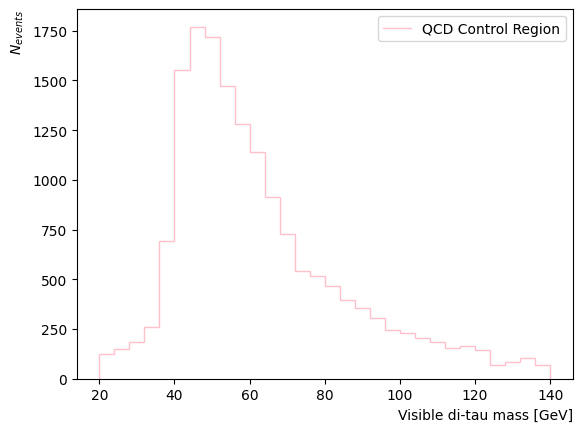

In [127]:
# Count Data in Opposite Sign (OS) Control Region (CR)
datacounts_CR, bins = np.histogram( OS_events[OS_events['label'].isin(data)]['m_vis'], bins=30, range=[20, 140])

# Count MC Backgrounds in the CR
bkgdcounts_CR, bins = np.histogram( OS_events[OS_events['label'].isin(backgrounds)]['m_vis'], bins=30, range=[20, 140])

# Subtract the MC Backgrounds from the Data
QCDcounts_CR = datacounts_CR - bkgdcounts_CR

# Safety check to remove negative bins
QCDcounts_CR = [0 if i < 0.0 else i for i in QCDcounts_CR]

# Draw the QCD in this control region
plt.stairs( QCDcounts_CR, bins, color='pink', label='QCD Control Region')

# Beautify
plt.ylabel(r'$N_{events}$', loc='top')
plt.xlabel('Visible di-tau mass [GeV]', loc='right')
plt.legend()

This is the QCD in a control region, so we need to derive a "transfer factor" to extrapolate the contribution to the signal region.

Where could this transfer factor come from?

In [128]:
# Now select isolated events
antiiso_events = events[
    (events['mt_1'] < 30) & # Muon transverse mass cut for W+jets suppression
    (events['iso_1'] > 0.1) # INVERT the muon isolation requirement
    ]

# Select SS events
SS_antiiso_events = antiiso_events [
    antiiso_events['q_1']*antiiso_events['q_2'] < 0
    ]

# Select OS events
OS_antiiso_events = antiiso_events [
    antiiso_events['q_1']*antiiso_events['q_2'] > 0
    ]

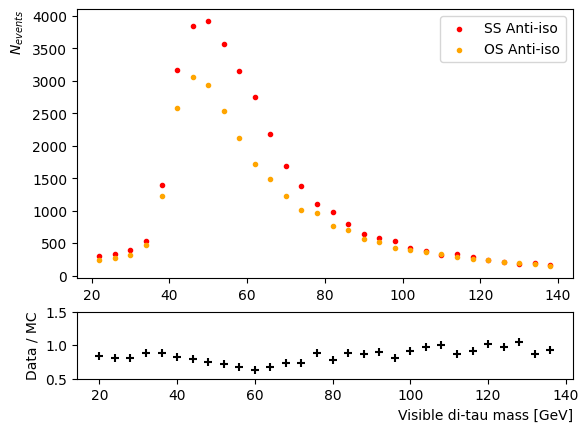

In [190]:
fig, (ax1, ax2) = plt.subplots( nrows=2, height_ratios=[4,1])

datacounts_SS_antiiso, bins = np.histogram( SS_antiiso_events[SS_antiiso_events['label'].isin(data)]['m_vis'], bins=30, range=[20, 140])
datacounts_OS_antiiso, bins = np.histogram( OS_antiiso_events[OS_antiiso_events['label'].isin(data)]['m_vis'], bins=30, range=[20, 140])

ax1.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), datacounts_SS_antiiso, marker='.', color='red', label='SS Anti-iso')
ax1.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), datacounts_OS_antiiso, marker='.', color='orange', label='OS Anti-iso')

# Beautify
# ax1.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax1.set_ylabel(r'$N_{events}$', loc='top')
ax1.legend()

# Add a Ratio Plot
ax2.scatter(bins[:-1], datacounts_OS_antiiso / datacounts_SS_antiiso, marker='+', color='black')
# ax2.axhline(1.0, linestyle='--', color='black')

ax2.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax2.set_ylabel('Data / MC')
ax2.set_ylim( [0.5, 1.5])

# Show the plots now...
plt.show()

In [139]:
average_ratio = sum(datacounts_OS_antiiso / datacounts_SS_antiiso) / len(datacounts_SS_antiiso)
print(average_ratio)
QCDcounts = [ i * average_ratio for i in QCDcounts_CR ]

0.8452776868577838


Is this the best to extrapolate with?

In [186]:
bkgdcounts_SS_antiiso, bins = np.histogram( SS_antiiso_events[SS_antiiso_events['label'].isin(backgrounds)]['m_vis'], bins=30, range=[20, 140])
bkgdcounts_OS_antiiso, bins = np.histogram( OS_antiiso_events[OS_antiiso_events['label'].isin(backgrounds)]['m_vis'], bins=30, range=[20, 140])

QCDcounts_SS_antiiso = datacounts_SS_antiiso - bkgdcounts_SS_antiiso
QCDcounts_OS_antiiso = datacounts_OS_antiiso - bkgdcounts_OS_antiiso

average_ratio = sum(QCDcounts_OS_antiiso / QCDcounts_SS_antiiso) / len(QCDcounts_SS_antiiso)
print(average_ratio)
QCDcounts = [ i * average_ratio for i in QCDcounts_CR ]

0.9104641885209739


What if we used the values directly from the bins?

In [193]:
QCDcounts = [ QCDcounts_CR[i] * (QCDcounts_OS_antiiso[i]/QCDcounts_SS_antiiso[i]) for i in range(len(QCDcounts_CR))]

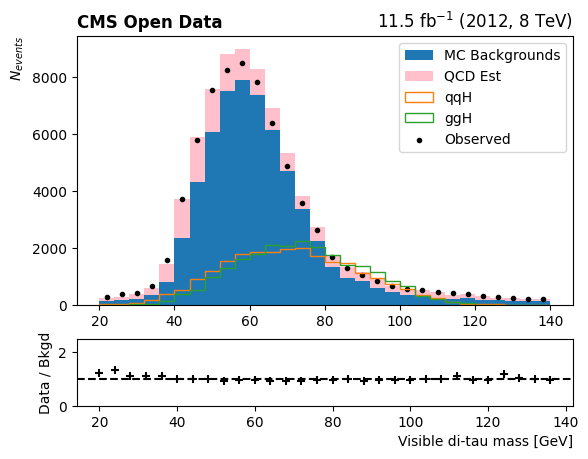

In [215]:
# Create 2 plots
fig, (ax1, ax2) = plt.subplots( nrows=2, height_ratios=[4,1])

# Stack the QCD estimation with the MC backgrounds
all_bkgdcounts = bkgdcounts + QCDcounts
ax1.hist( [bins[:-1], bins[:-1]], bins, weights=[bkgdcounts, QCDcounts], stacked=True, color=['C0', 'pink'], label=['MC Backgrounds', 'QCD Est'])

# Redraw the other things
ax1.hist(bins[:-1], bins, weights=qqHcounts, histtype='step', color='C1', label='qqH')
ax1.hist(bins[:-1], bins, weights=ggHcounts, histtype='step', color='C12', label='ggH')
ax1.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), datacounts, marker='.', color='black', label='Observed')

# Beautify
ax1.set_ylabel(r'$N_{events}$', loc='top')
ax1.set_title('CMS Open Data', fontweight='bold', loc='left')
ax1.set_title(r'11.5 fb$^{-1}$ (2012, 8 TeV)', loc='right')
ax1.legend()

# Add a Ratio Plot
ax2.scatter(bins[:-1], datacounts / all_bkgdcounts, marker='+', color='black')
ax2.axhline(1.0, linestyle='--', color='black')

ax2.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax2.set_ylabel('Data / Bkgd')
ax2.set_ylim( [0, 2.5])

# Show the plots now...
plt.show()

Our background prediction now lines up much better with the observed data! Is there a better way we could have extrapolated the QCD contribution from the CR?

Topics for Discussion:
- What if we had chosen a different set of variables?
- How do we quantify the errors in this estimation?
- What are the limitations of this method?

For fun, let's make one extra pretty plot, showing the contributions from all of the backgrounds

[<matplotlib.collections.PolyCollection object at 0x7f91600fc040>, <matplotlib.collections.PolyCollection object at 0x7f91600ffdc0>, <matplotlib.collections.PolyCollection object at 0x7f91600ff250>, <matplotlib.collections.PolyCollection object at 0x7f91911f5870>, <matplotlib.collections.PolyCollection object at 0x7f918d3f8f10>, <matplotlib.collections.PolyCollection object at 0x7f918cca4400>, <matplotlib.collections.PolyCollection object at 0x7f918cca5db0>]


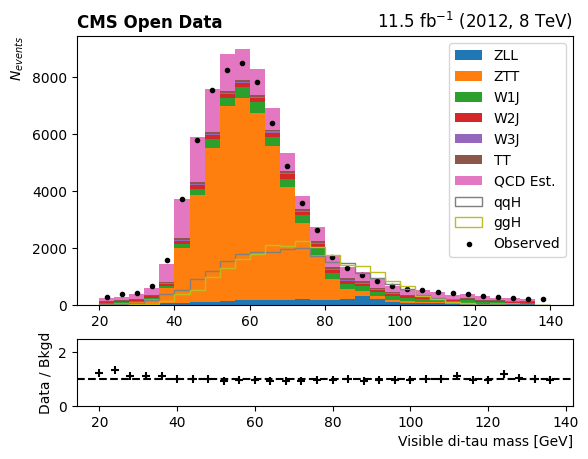

In [224]:
# Create 2 plots
fig, (ax1, ax2) = plt.subplots( nrows=2, height_ratios=[4,1])

# Separate the MC backgrounds and their weights
m_vis   = [SS_events[SS_events['label']==label]['m_vis'] for label in backgrounds]
weights = [SS_events[SS_events['label']==label]['weight'] for label in backgrounds]

# Now create histograms for each (np.histogram returns a tuple)
counts_and_bins = [np.histogram( c, weights=w, bins=30, range=[20, 140]) for c, w in zip(m_vis, weights)]

# Add in the QCD histogram we've already created
counts_and_bins.append((QCDcounts, bins))

# And now stack them all
ax1.stackplot( counts_and_bins[0][1][:-1], [i[0] for i in counts_and_bins], step='post', labels=backgrounds+['QCD Est.'])

# Redraw the other things
ax1.hist(bins[:-1], bins, weights=qqHcounts, histtype='step', label='qqH')
ax1.hist(bins[:-1], bins, weights=ggHcounts, histtype='step', label='ggH')
ax1.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), datacounts, marker='.', color='black', label='Observed')
# ax1.scatter(bins[:-1], datacounts, marker='.', color='black', label='Observed')

# Beautify
ax1.set_ylabel(r'$N_{events}$', loc='top')
ax1.set_title('CMS Open Data', fontweight='bold', loc='left')
ax1.set_title(r'11.5 fb$^{-1}$ (2012, 8 TeV)', loc='right')
ax1.legend()

# Add a Ratio Plot
ax2.scatter(bins[:-1], datacounts / all_bkgdcounts, marker='+', color='black')
ax2.axhline(1.0, linestyle='--', color='black')

ax2.set_xlabel('Visible di-tau mass [GeV]', loc='right')
ax2.set_ylabel('Data / Bkgd')
ax2.set_ylim( [0, 2.5])

# Show the plots now...
plt.show()

# Notes

This exercise is based heavily on an existing [CMS Open Data workshop](https://cms-opendata-workshop.github.io/workshop-lesson-abcd-method/), designed by Santeri Laurila (CERN) and Stefan Wunsch (CERN).

Adaptations were made to remove the need for ROOT to be used.